# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with experimental data from the paper "The Many Faces of Human Sociality: Uncovering the Distribution and Stability of Social Preferences" by Bruhin, Fehr, and Schunk, published in the *Journal of the European Economic Association* 17(4): 1025-1069, 2019: https://doi.org/10.1093/jeea/jvy018

**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. XXXXXX
2. YYYYYY
3. ZZZZZZ

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import folium
from folium.plugins import MarkerCluster

The authors observe human behavior in the so-called dictator game: One player (*dictator*) receives a certain amount of money and can distribute this endowment between herself and another player (*receiver*). The decision of the dictator is implemented, and the receiver has no choice to take and must accept the dictator's decision. <br>
The authors employ a binary version of the dictator game in which the dictator can choose between two alternative allocation options *X* and *Y*. Each dictator in the experiment plays 30 of these dictator games with varying pairs of decision alternatives. <br>
All subjects in the experiment were students from the University of Zurich and the Swiss Federal Institute of Technology Zurich.

# Problem 1 - Data Handling
The basis of your work will be the following two datasets:
- `choices.csv` contains the decisions of the dictators across the 30 variations of the binary dictator game.
    - *sid* is the ID of the subject.
    - *gid* is the ID of the game variation.
    - *order* is the (random) order in which the game appeared in the block of dictator games.
    - *self_x* and *self_y* are the payoffs of the dictator in choice option X and Y, respectively.
    - *other_x* and *other_y* are the payoffs of the receiver in choice option X and Y, respectively.
    - *choice_x* describes the decision of the dictator, with a value of 1 representing the choice of option X, and 0 the choice of option Y.
    - *s_x* and *s_y* are indicators of disadvantageous inequality for the dictator in option X and option Y, respectively. That is, *s_x* equals 1 if the dictator receives lower payoff in option X than the receiver, and 0 if the dictator receive higher payoff in option X than the receiver. 
    - *r_x* and *r_y* are indicators of advantageous inequality for the dictator in option X and option Y, respectively. That is, *r_x* equals 1 if the dictator receives higher payoff in option X than the receiver, and 0 if the dictator receive lower payoff in option X than the receiver. 
    - Note that *r_x = 1 - s_x* and *r_y = 1 - s_y*
- `subjects.csv` contains the results from the post-experimental questionnaire.
    - *sid* is the ID of the subject.
    - *bf_consciousness, bf_openness, bf_extraversion, bf_agreeableness, bf_neuroticism* are the results from the Big Five measures.
    - *cogabil* is a measure of cognitive ability.
    - *pe_D1_stud_natsci, pe_D1_stud_law, pe_D1_stud_socsci, pe_D1_stud_med* indicate the subject's field of study (natural sciences, law, social sciences, or medicine, respectively).
    - *pe_monthinc* is the subject's monthly income.
    - *pe_age* is the subject's age.
    - *pe_female* equals 1 if the subject is female, and 0 otherwise.

In [2]:
choices = pd.read_csv("choices.csv", sep=",")
choices

,sid,gid,order,self_x,self_y,other_x,other_y,choice_x,s_y,s_x,r_y,r_x
0,102010050706,361,1,940,800,150,510,0,0,0,1,1
1,102010050706,281,2,970,770,490,170,0,0,0,1,1
2,102010050706,391,3,1060,680,330,330,1,0,0,1,1
3,102010050706,271,4,990,750,480,180,1,0,0,1,1
4,102010050706,311,5,930,810,510,150,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6781,172010050704,251,35,780,420,540,660,1,1,0,0,1
6782,172010050704,191,36,680,520,780,420,0,0,1,1,0
6783,172010050704,221,37,620,580,410,790,1,1,0,0,1
6784,172010050704,231,38,670,530,420,780,1,1,0,0,1


In [3]:
subjects = pd.read_csv("subjects.csv", sep=",")
subjects

,sid,bf_consciousness,bf_openness,bf_extraversion,bf_agreeableness,bf_neuroticism,cogabil,pe_D1_stud_natsci,pe_D1_stud_law,pe_D1_stud_socsci,pe_D1_stud_med,pe_monthinc,pe_age,pe_female
0,12010050501,9,17,4,11,-1,3,1,0,0,0,400,21,1
1,12010050502,5,22,4,7,7,7,1,0,0,0,800,21,0
2,12010050603,4,18,4,9,7,3,0,0,1,0,800,23,0
3,12010050704,8,17,1,10,7,9,1,0,0,0,500,22,0
4,12010050705,10,15,-3,12,0,4,0,0,0,1,350,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,312010050705,5,18,0,11,1,12,1,0,0,0,500,20,0
156,322010050501,6,18,8,8,8,6,0,0,0,1,450,20,1
157,332010050501,7,19,8,7,-1,6,0,0,0,1,600,20,0
158,342010050501,10,17,0,9,7,8,0,0,0,1,300,20,1


#### a)
Merge the two datasets into one. <br>
Check whether you have behavioral data (from `choices`) and personal information (from `subjects`) on all subjects. <br>
If not, create an indicator for missing data and list the IDs of the subjects concerned.

In [4]:
# Merge datasets on 'sid' column
merged_df = pd.merge(choices, subjects, on='sid', how='outer', indicator=True)

# Create an indicator for missing data
merged_df['missing_data'] = merged_df['_merge'] != 'both'

# List the IDs of the subjects with missing data
missing_subjects = merged_df[merged_df['missing_data']]['sid'].unique()

# Display the merged dataframe and missing subjects
print("Merged DataFrame with Missing Data Indicator:")
print(merged_df)
print("\nIDs of subjects with missing data:")
print(missing_subjects)

Merged DataFrame with Missing Data Indicator:
               sid  gid  order  self_x  self_y  other_x  other_y  choice_x  \
0      12010050501  121      1     510     150      810      930         1   
1      12010050501  341      2     870     870      140      520         1   
2      12010050501  291      3     890     850      520      140         1   
3      12010050501  101      4     400     260      690     1050         1   
4      12010050501  351      5     890     850      140      520         1   
...            ...  ...    ...     ...     ...      ...      ...       ...   
6781  362010050501  141     35     720     480      750      450         0   
6782  362010050501  211     36     600     600      410      790         1   
6783  362010050501  171     37     640     560      790      410         0   
6784  362010050501  221     38     620     580      410      790         1   
6785  362010050501  251     39     780     420      540      660         1   

      s_y  s_x  .

#### b)
Try out different representations of the data (long vs. wide etc.).

In [5]:
# with the current data structure, we already have a wide representation of the data
# means each subject has a single row with columns for each game variation and personal information.

# To transform the data into long format, we can use pd.melt to reshape the DataFrame so that each row corresponds to a single observation in a game.
# The id_vars parameter contains columns that should remain as identifiers (sid and the columns from the subjects DataFrame). 
# The value_vars parameter lists the columns that should be unpivoted. The resulting DataFrame (long_df) will have three main columns: sid, variable, and value.

# Columns related to choices
choice_cols = ['gid', 'order', 'self_x', 'self_y', 'other_x', 'other_y', 'choice_x', 's_x', 's_y', 'r_x', 'r_y']

# Melting the merged dataframe to long format
long_df = pd.melt(merged_df, id_vars=['sid'] + list(subjects.columns[1:]), 
                  value_vars=choice_cols, 
                  var_name='variable', value_name='value')

# Display the long dataframe
print("\nLong Format DataFrame:")
print(long_df)



Long Format DataFrame:
                sid  bf_consciousness  bf_openness  bf_extraversion  \
0       12010050501               9.0         17.0              4.0   
1       12010050501               9.0         17.0              4.0   
2       12010050501               9.0         17.0              4.0   
3       12010050501               9.0         17.0              4.0   
4       12010050501               9.0         17.0              4.0   
...             ...               ...          ...              ...   
74641  362010050501               NaN          NaN              NaN   
74642  362010050501               NaN          NaN              NaN   
74643  362010050501               NaN          NaN              NaN   
74644  362010050501               NaN          NaN              NaN   
74645  362010050501               NaN          NaN              NaN   

       bf_agreeableness  bf_neuroticism  cogabil  pe_D1_stud_natsci  \
0                  11.0            -1.0      3.0    

# Problem 2 - Data Visualization
#### a)
As a first type of visualization, focus on the choices and the decision scenarios. <br>
That is, use the payoffs and indicators of (dis)advantageous inequality. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

### Histogram of Payoffs
 This visualization helps to understand the distribution of payoffs for both the dictator and the receiver. 
 
As to be expected, the payoffs for the dictator are higher than the payoffs for the receiver. 
 

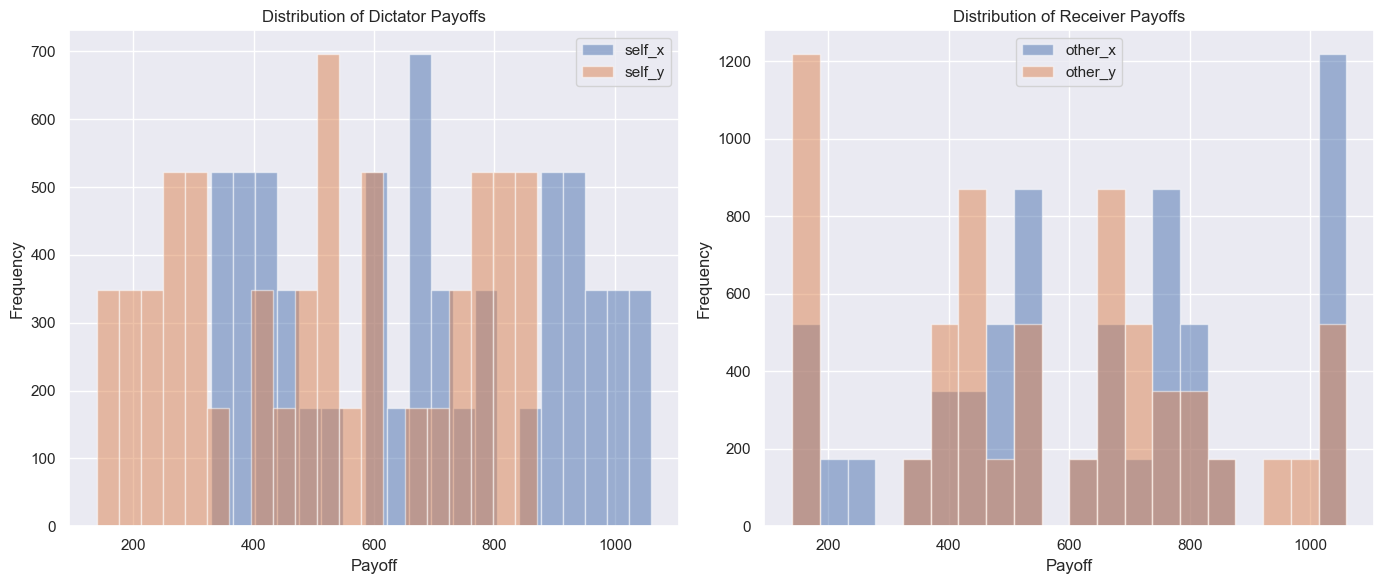

In [6]:
# Histogram of dictator payoffs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

plt.hist(merged_df['self_x'], bins=20, alpha=0.5, label='self_x')
plt.hist(merged_df['self_y'], bins=20, alpha=0.5, label='self_y')
# X-Axis (Payoff): This axis indicating different payoff values.
plt.xlabel('Payoff')
# Y-Axis (Frequency): This axis indicating the frequency of each payoff value.
plt.ylabel('Frequency')
plt.title('Distribution of Dictator Payoffs')
plt.legend()

# Histogram of receiver payoffs
plt.subplot(1, 2, 2)
plt.hist(merged_df['other_x'], bins=20, alpha=0.5, label='other_x')
plt.hist(merged_df['other_y'], bins=20, alpha=0.5, label='other_y')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.title('Distribution of Receiver Payoffs')
plt.legend()

plt.tight_layout()
plt.show()

### Box Plot of Payoffs and Choices
Create box plots to see how the payoffs relate to the choices made by the dictators.


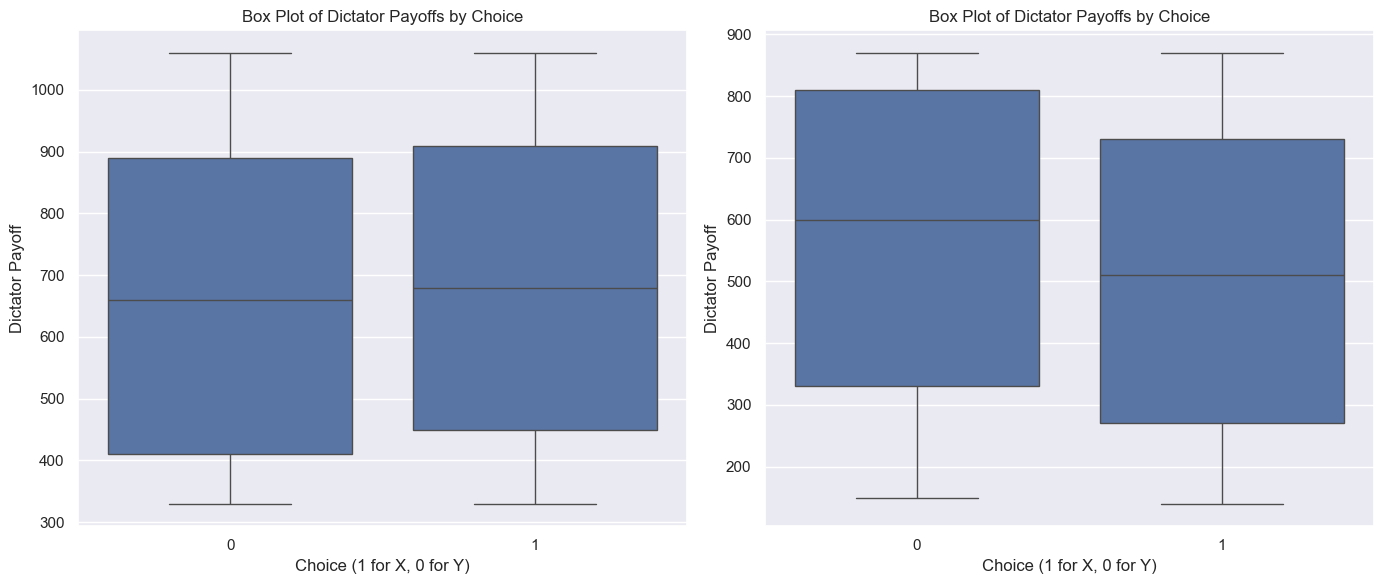

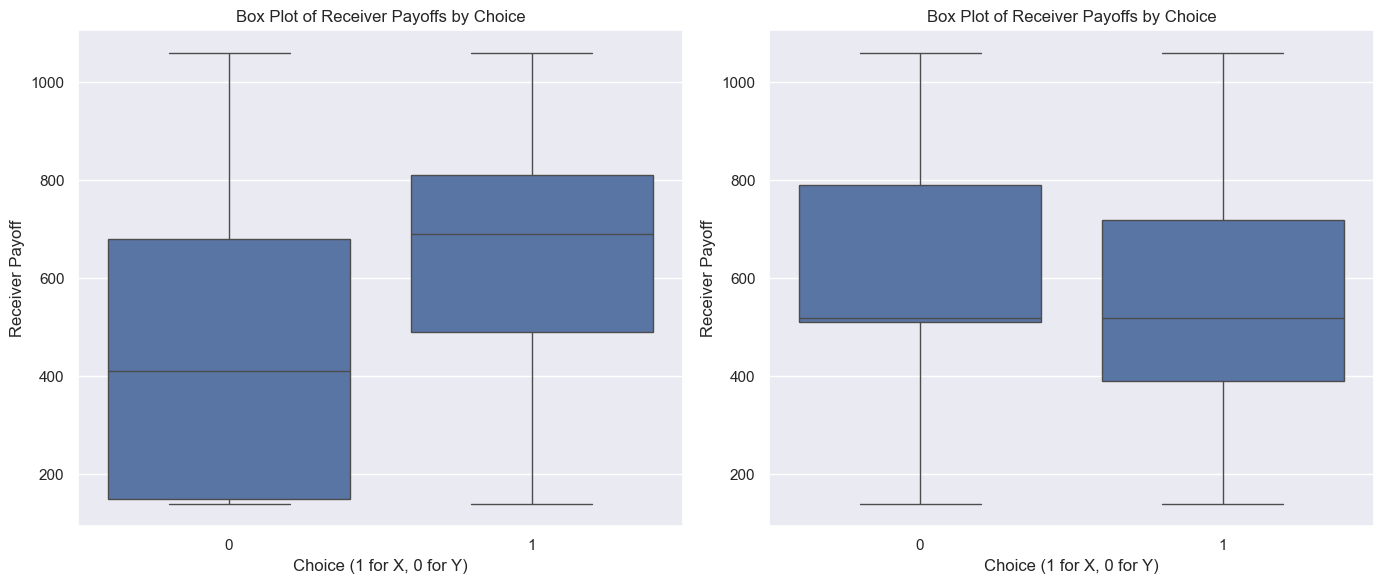

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for dictator's payoffs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='choice_x', y='self_x', data=merged_df)
plt.xlabel('Choice (1 for X, 0 for Y)')
plt.ylabel('Dictator Payoff')
plt.title('Box Plot of Dictator Payoffs by Choice')

plt.subplot(1, 2, 2)
sns.boxplot(x='choice_x', y='self_y', data=merged_df)
plt.xlabel('Choice (1 for X, 0 for Y)')
plt.ylabel('Dictator Payoff')
plt.title('Box Plot of Dictator Payoffs by Choice')

plt.tight_layout()
plt.show()

# Box plots for receiver's payoffs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='choice_x', y='other_x', data=merged_df)
plt.xlabel('Choice (1 for X, 0 for Y)')
plt.ylabel('Receiver Payoff')
plt.title('Box Plot of Receiver Payoffs by Choice')

plt.subplot(1, 2, 2)
sns.boxplot(x='choice_x', y='other_y', data=merged_df)
plt.xlabel('Choice (1 for X, 0 for Y)')
plt.ylabel('Receiver Payoff')
plt.title('Box Plot of Receiver Payoffs by Choice')

plt.tight_layout()
plt.show()


### Bar Plot of Inequality Indicators
This plot shows the frequency of (dis)advantageous inequality scenarios. It can reveal if dictators often face situations where they are at an advantage or disadvantage and how these scenarios might affect their decisions.

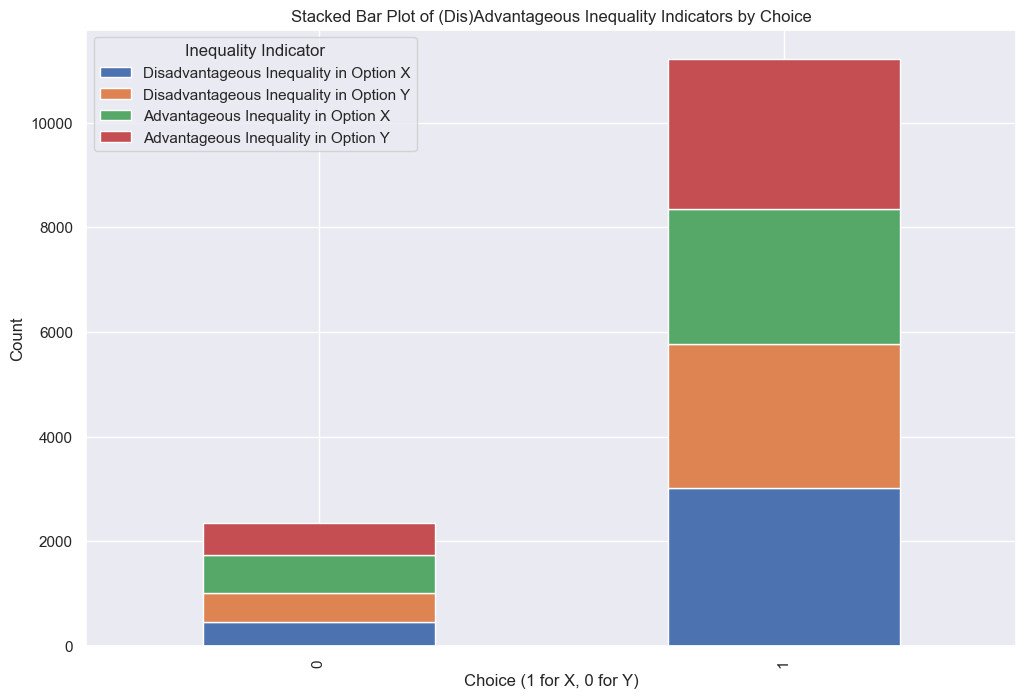

In [8]:

# Calculate the counts of each inequality indicator by choice
inequality_by_choice = merged_df.groupby('choice_x')[['s_x', 's_y', 'r_x', 'r_y']].sum()

# Rename the columns for better labels
inequality_by_choice.columns = [
    'Disadvantageous Inequality in Option X',
    'Disadvantageous Inequality in Option Y',
    'Advantageous Inequality in Option X',
    'Advantageous Inequality in Option Y'
]

# Plot stacked bar chart
inequality_by_choice.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Choice (1 for X, 0 for Y)')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of (Dis)Advantageous Inequality Indicators by Choice')
plt.legend(title='Inequality Indicator')
plt.show()


#### b)
Now also include the information on the subjects from the questionnaires in your plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

# Problem 3 - Supervised Machine Learning
#### a)
Try to predict the choices of subjects using the information provided. <br>
Report the performance measures for different predictor variables.

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 1}
Accuracy: 0.8974358974358975
ROC-AUC: 0.8740776794544521


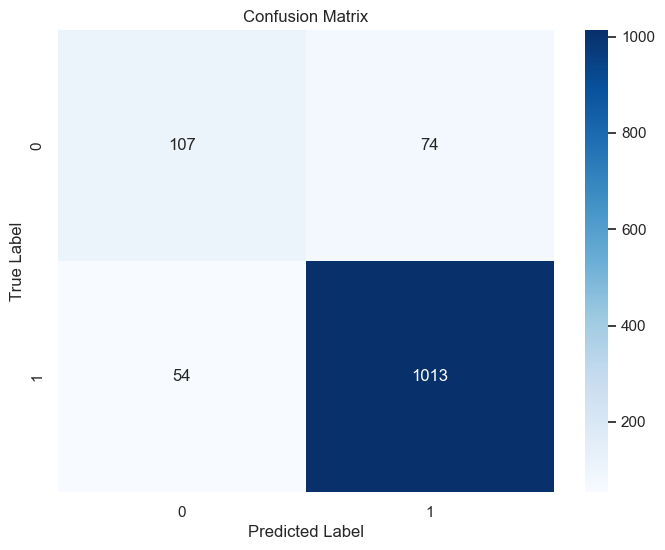

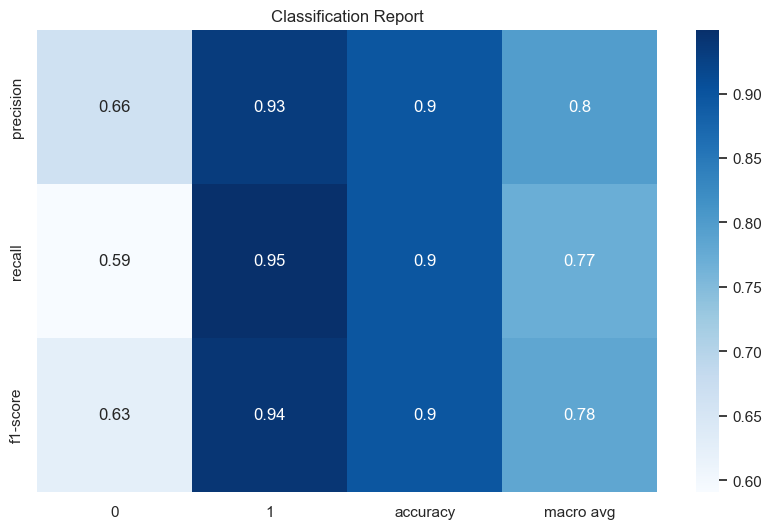

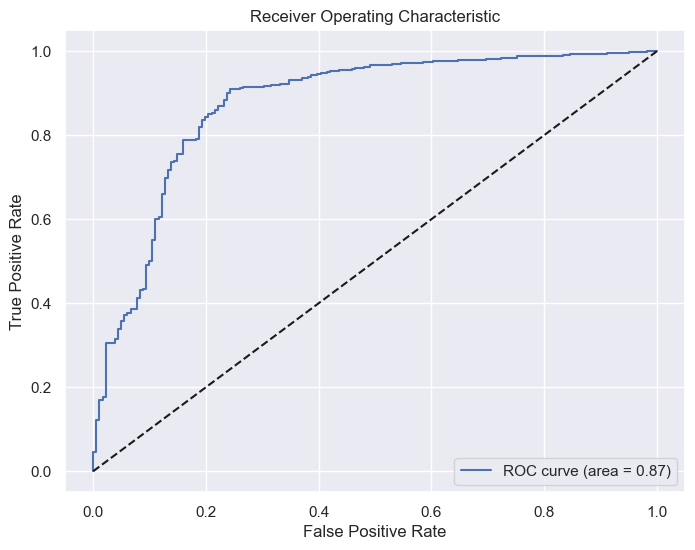

Training Random Forest...


C:\Users\FelixNeubauer\anaconda3\envs\tds310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\FelixNeubauer\anaconda3\envs\tds310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FelixNeubauer\anaconda3\envs\tds310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\FelixNeubauer\anaconda3\envs\tds310\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    val

Best parameters for Random Forest: {'max_features': 'log2', 'n_estimators': 100}
Accuracy: 0.9006410256410257
ROC-AUC: 0.9250441419376887


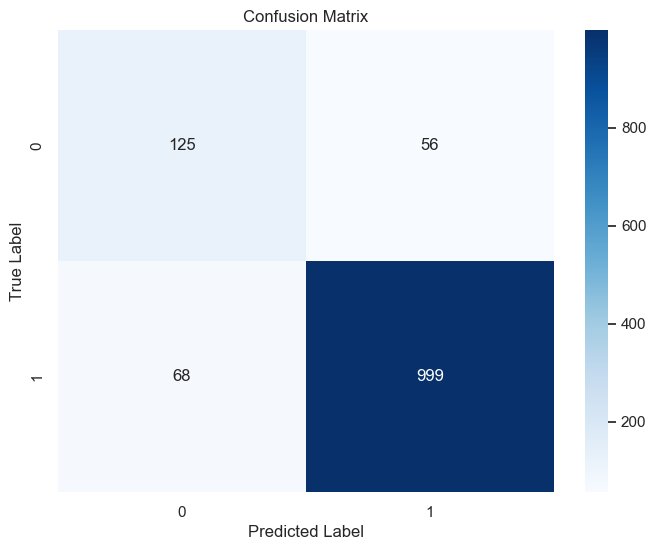

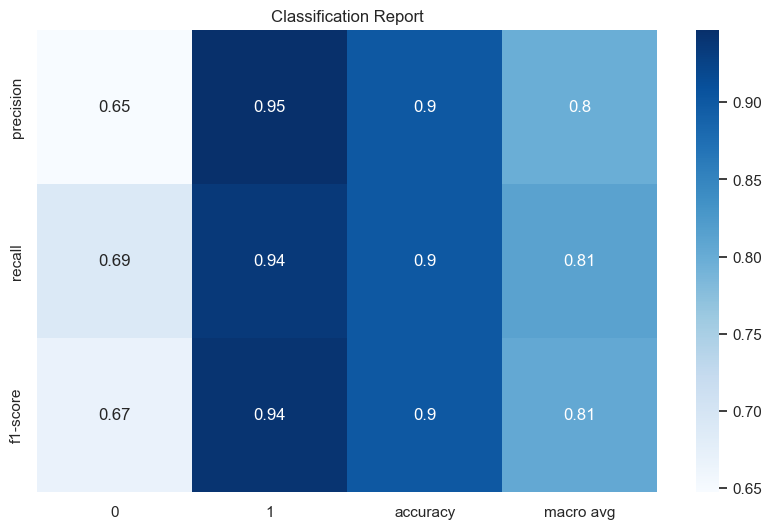

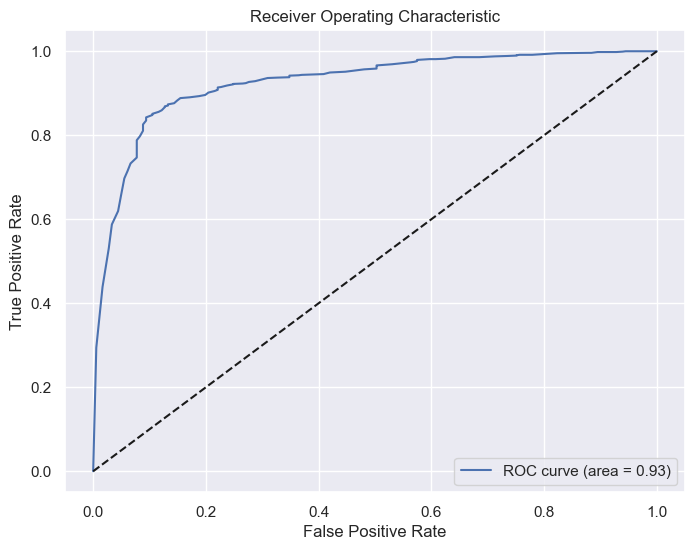

Training SVM...
Best parameters for SVM: {'C': 100, 'kernel': 'rbf'}
Accuracy: 0.9086538461538461
ROC-AUC: 0.9308227228714784


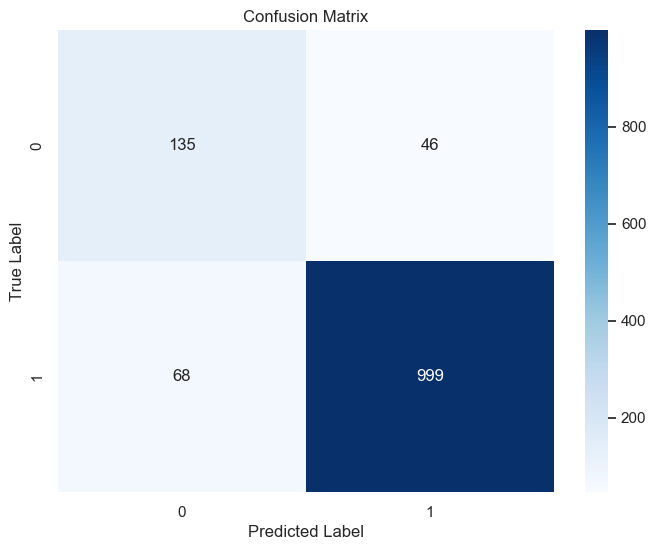

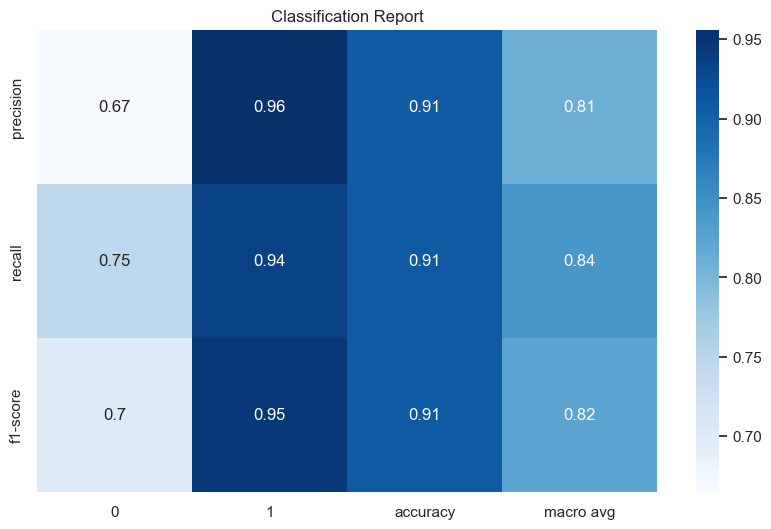

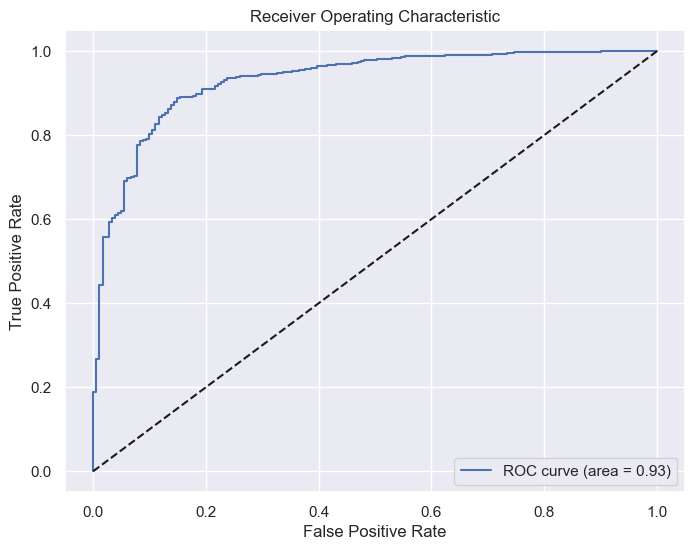

                     Accuracy   ROC-AUC
Logistic Regression  0.897436  0.874078
Random Forest        0.900641  0.925044
SVM                  0.908654  0.930823
              Feature  Importance
2             other_x    0.148996
0              self_x    0.113468
3             other_y    0.111120
1              self_y    0.106546
18        pe_monthinc    0.060353
12     bf_neuroticism    0.059614
13            cogabil    0.056144
9         bf_openness    0.055665
10    bf_extraversion    0.054804
8    bf_consciousness    0.053124
11   bf_agreeableness    0.052037
19             pe_age    0.044228
20          pe_female    0.017834
14  pe_D1_stud_natsci    0.012594
4                 s_x    0.011557
16  pe_D1_stud_socsci    0.007683
5                 s_y    0.007599
6                 r_x    0.007569
17     pe_D1_stud_med    0.007299
7                 r_y    0.006869
15     pe_D1_stud_law    0.004900


,Feature,Importance
2,other_x,0.148996
0,self_x,0.113468
3,other_y,0.111120
1,self_y,0.106546
18,pe_monthinc,0.060353
12,bf_neuroticism,0.059614
13,cogabil,0.056144
9,bf_openness,0.055665
10,bf_extraversion,0.054804
8,bf_consciousness,0.053124


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

def preprocess_data(df, features, target):
    # Drop rows with missing data
    df = df.dropna(subset=features + [target])
    
    # Drop unnecessary columns
    df = df.drop(columns=['_merge', 'missing_data'], errors='ignore')
    
    # Define features and target
    X = df[features]
    y = df[target]
    
    # Handle missing values by filling with the mean
    X = X.fillna(X.mean())
    
    return X, y

def split_and_scale_data(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Standardize the feature variables
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Calculate ROC-AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None
    
    return accuracy, conf_matrix, class_report, roc_auc

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def plot_classification_report(class_report):
    report_df = pd.DataFrame(class_report).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='Blues')
    plt.title('Classification Report')
    plt.show()

def plot_roc_curve(y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def feature_importance_rf(model, features):
    feature_importances = model.feature_importances_
    feature_importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print(feature_importances_df)
    return feature_importances_df

# Define feature columns and target variable
features = ['self_x', 'self_y', 'other_x', 'other_y', 's_x', 's_y', 'r_x', 'r_y',
            'bf_consciousness', 'bf_openness', 'bf_extraversion', 'bf_agreeableness', 
            'bf_neuroticism', 'cogabil', 'pe_D1_stud_natsci', 'pe_D1_stud_law', 
            'pe_D1_stud_socsci', 'pe_D1_stud_med', 'pe_monthinc', 'pe_age', 'pe_female']
target = 'choice_x'

# Preprocess the data
X, y = preprocess_data(merged_df, features, target)

# Split and scale the data
X_train, X_test, y_train, y_test = split_and_scale_data(X, y)

# Define models and hyperparameters for tuning
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_features': ['auto', 'sqrt', 'log2']},
    'SVM': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
}

# Train and evaluate each model with hyperparameter tuning
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    accuracy, conf_matrix, class_report, roc_auc = train_and_evaluate_model(best_model, X_train, X_test, y_train, y_test)
    
    results[model_name] = {
        'model': best_model,
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'class_report': class_report,
        'roc_auc': roc_auc
    }

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    if roc_auc:
        print(f"ROC-AUC: {roc_auc}")
    plot_confusion_matrix(conf_matrix)
    plot_classification_report(class_report)
    if roc_auc:
        plot_roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Compare the models
comparison_df = pd.DataFrame({
    model_name: {
        'Accuracy': result['accuracy'],
        'ROC-AUC': result['roc_auc']
    } for model_name, result in results.items()
}).T

print(comparison_df)

# Feature importance for RandomForest
feature_importance_rf(results['Random Forest']['model'], features)


#### b)
Try to fill the gaps in the data using appropriate prediction models.

In [10]:
# Insert your code here.

#### c)
The questionnaire by Bruhin et al. comprises personality traits according to the Big Five. <br>
This question asks you to impute other (economic) preferences of the study participants. <br>
Examples include:
- Social preferences (inequity aversion, reciprocity, guilt aversion...)
- Time preferences (myopia, present bias...)
- Risk preferences
- ...

Your taks is thus the following:
1. Find a dataset on individuals that contains the Big Five along with other preference measures. Think of datasets used in scientific publications.
2. Train models to predict the other preferences from the Big Five. Evaluate their performance.
3. Make an out-of sample prediction using the fitted models to impute the preference measures for the study participants of Bruhin et al.

In [11]:
# Insert your code here.

# Problem 4 - Unsupervised Machine Learning 
Use subjects' behaviors and information from the questionnaire to cluster individuals. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified? <br>
Do the clusters change when you include the imputed preferences from Problem 3c)?

In [12]:
# Insert your code here.